# PyTorch Data Loading and Transformation

**by Dan Novischi**

Our ultimate goal when preparing our data is to do the following (ETL):
1. Extract - Get the data from the source.
2. Transform - Put our data into tensor form.
3. Load - Put our data into an object to make it easily accessible.

For these purposes, PyTorch provides us with two classes:
- `torch.utils.data.Dataset`	An abstract class for representing a dataset.
- `torch.utils.data.DataLoader`	Wraps a dataset and provides access to the underlying data.

To create a custom dataset using PyTorch, we extend the `Dataset` class by creating a subclass that implements the required methods. Upon doing this, our new subclass can then be passed to the a PyTorch DataLoader object. Specifically, there are two methods that are required to be implemented. The `__len__` method which returns the length of the dataset, and the `__getitem__` method that gets an element at a specific index location within the dataset.


However, we will be using the MNIST dataset that comes built-in with the `torchvision` package, so we won't have to do this for our project. Just know that the MNIST built-in dataset class is doing this behind the scenes.

<img src='res/mnist.png'>

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt

## PyTorch Dataset Class


To get an instance of the `MNIST` dataset using `torchvision` we first need to import either: i) the torchvision main package or ii) its sub-packages containing this functionality, namely:

In [1]:
# Importing the main package
import torchvision

In [4]:
# Importing the appropiate sub-packages
from torchvision import datasets, transforms

We can use either method to obtain an instance of the dataset as follows:

In [5]:
# 1. Creating an MNIST training set instance by using the main package
train_set = torchvision.datasets.MNIST(
    root='./datasets/'
    ,train=True
    ,download=True
    ,transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor()
    ])
)

# 2. Creating an MNIST traning set through the sub-packages
# a) Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# b) Download and load the training data
train_set = datasets.MNIST(
    root='./datasets/', 
    download=True, 
    train=True, 
    transform=transform
)

Here we used the a bunch of arguments that are summarized in the table below.

| **Parameter** | **Description** |
| :--- | :--- |
| root | The location on disk where the data is located. |
| train | True if we chose the training set. |
| download | True if we want to download the data. |
| transform | A composition of transformations that  should <br> be  performed on the dataset elements.|

Note that since we want our images to be transformed into tensors, we use the built-in `transforms.ToTensor()` transformation. Moreover, since this dataset is going to be used for training, we named the instance `train_set`.


When this code for ran for the first time, the MNIST training dataset was downloaded locally. Subsequent calls check for the data before downloading it. Thus, we don't have to worry about double downloads or repeated network calls.

## PyTorch DataLoader Class

To iterate through our data we need to create a `DataLoader` warper instance. We can do it like this:

In [10]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=1000,
    shuffle=True
)

We just pass `train_set` as an argument. Now, we can leverage the loader for tasks that would otherwise be pretty complicated to implement by hand.

| **Parameter** | **Description** |
| :--- | :--- |
| batch_size | 1000 in our case. |
| shuffle | True in our case. |
| num_workers | Default is 0 which means the main process will be used. |


We could of course import the `DataLoader` separately and proceed as we did for `train_set` in the second approach.

# Exploring the Data

To see how many images are in our training set, we can check the length of the dataset using the Python `len()` function:

In [11]:
len(train_set)

60000

Suppose we want to see the labels for each image. This can be done like so:

In [12]:
train_set.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

Note that before version 0.2.1 `torchvision` had a slightly different API. For version 0.2.1 we would have written: 

In [13]:
train_set.train_labels

/Users/madalinamarcu/.pyenv/versions/3.10.5/lib/python3.10/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4,  ..., 5, 6, 8])

As can be seen this generates a warning and its not likely to be supported in future versions.

The first image is a 5, while the next two are 0 and 4. These values encode the actual class name or label. If we want to see how many of each label exists in the dataset, we can use the PyTorch bincount() function like so:

In [14]:
train_set.targets.bincount()

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

## Accessing data in the training set

To access an individual element from the training set, we first pass the `train_set` object to Python’s `iter()` built-in function, which returns an object representing a stream of data.

With the stream of data, we can use Python built-in `next()` function to get the next data element in the stream of data. From this we are expecting to get a single sample, so we'll name the result accordingly:

In [15]:
sample = next(iter(train_set))
len(sample)

2

After passing the sample to the `len()` function, we can see that the sample contains two items, and this is because the dataset contains image-label pairs. Each sample we retrieve from the training set contains the image data as a tensor and the corresponding label as a tensor.

Since the sample is a sequence type, we can use `sequence unpacking` to assigned the image and the label. We can then check the type of the image and the label and see that image is of type `torch.Tensor` and label is indeed an `int`.

In [16]:
image, label = sample

In [17]:
type(image)

torch.Tensor

In [18]:
type(label)

int

We'll check the shape to see that the image is a 1 x 28 x 28 tensor:

In [19]:
image.shape

torch.Size([1, 28, 28])

The reason we see a 1 on the first dimension of the tensor is because the number of channels needs to be represented. Opposed to RGB images that have 3 color channels, grayscale images have a single color channel. This is why we have a 1 x 28 x 28 tensor. We have 1 color channel that has a size of 28 x 28.
 
We can also call the `squeeze()` function on the image to remove the dimension of size 1 so that we can plot the image afterwards.

In [20]:
image.squeeze().shape

torch.Size([28, 28])

Let's plot the image now, we squeeze the tensor and then pass it to the `imshow()` function.

5

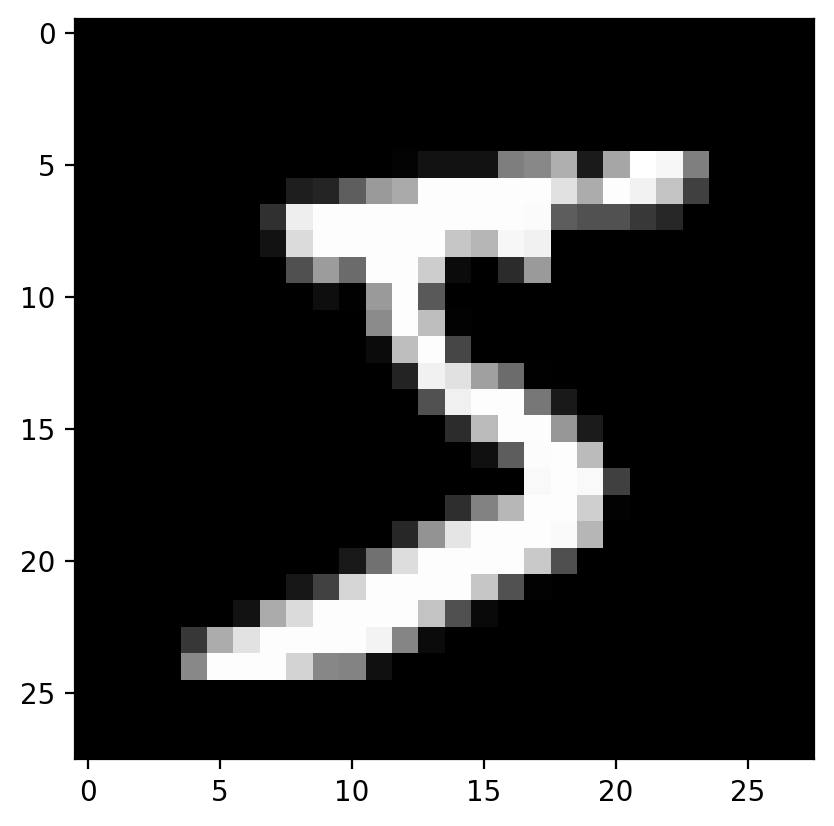

In [22]:
plt.imshow(image.squeeze(), cmap="gray")

label


## Working with batches of data

We'll start by creating a new data loader with a smaller batch size of 10 so it's easy to demonstrate what's going on:

In [23]:
display_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10
)

We get a batch from the loader in the same way that we saw with the training set. We use the `iter()` and next() functions.

There is one thing to notice when working with the data loader. If `shuffle=True`, then the batch will be different each time a call to next occurs. With `shuffle=False`, the first samples in the training set will be returned on the first call to next. 

Note that shuffle functionality is turned off by default.

In [24]:
batch = next(iter(display_loader))
len(batch)

2

Checking the length of the returned batch, we get 2 just like we did with the training set. Let's unpack the batch and take a look at the two tensors types and their shapes:

In [25]:
images, labels = batch

In [26]:
type(images)

torch.Tensor

In [27]:
type(labels)

torch.Tensor

In [35]:
images.shape

torch.Size([10, 1, 28, 28])

In [36]:
labels.shape

torch.Size([10])

Since batch_size=10, we know we are dealing with a batch of 10 images and 10 corresponding labels. 

The types are tensors like we'd expect. However, the shapes are different from what we saw with the single sample. Instead of having a single scalar value as our label, we have a rank-1 tensor with 10 values. 

The batch size of 10, is why we now have a 10 in the leading dimension of the tensor, i.e. for indexing each image. The following gives us the shape  of first image in the batch:

In [38]:
images[0].shape

torch.Size([1, 28, 28])

In [39]:
labels[0]

tensor(5)

To plot a batch of images, we can use the `torchvision.utils.make_grid()` function to create a grid that can be plotted like so:

In [40]:
grid = torchvision.utils.make_grid(images, nrow=10)

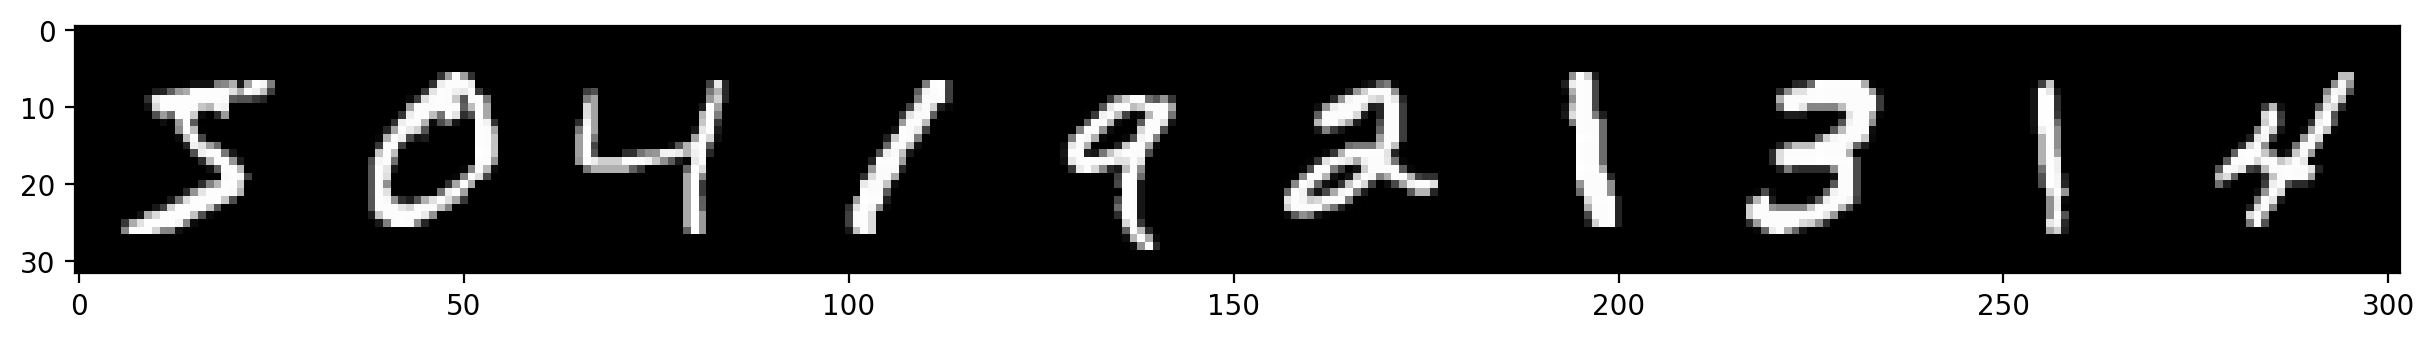

In [41]:
plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

In [42]:
labels

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])